# MODELO CONTINUO <br>

## Equipo:

    - Diana Catalina Velásquez
    - Mauricio Cuscagua
    - Camila Mejía
    
### Variables seleccionadas:
    - x23, x25

## Se requieren las siguientes librerías:
    - pandas
    - numpy
    - sklearn
    - pickle

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pickle

## Lectura del archivo

**path_of_file**: es la ruta donde se encuentra el archivo con los datos que se quiere predecir.<br>
**name_variable_y**: es el nombre de la variable respuesta que en los archivos enviados de prueba era "y".

In [2]:
path_of_file = 'continuous_test.csv'
name_variable_y = 'y'

In [3]:
test = pd.read_csv(path_of_file, sep = ',', na_filter = False)

X_test = test.drop(columns = [name_variable_y]).copy()
y_test = test[[name_variable_y]].copy()

## Cargar el modelo

**path_model**: ruta donde se encuentra la estructura enviada por el equipo, por facilidad mejor dejarla en la misma carpeta donde se ejecute el Jupyter notebook

In [4]:
path_model = 'modelContinuos.sav'

In [5]:
model = pickle.load(open(path_model, 'rb'))

## Función de evaluación

In [6]:
def evaluate_model(model,X,y):
    variablesSelected = model['variableSelected']
    X_eval = X[variablesSelected].copy()
    y_pred = model['model'].predict(X_eval)

    y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=["y_pred"])

    total = y_pred.join(y_test)
    total['y_menor_-1'] = (total['y']<-1).astype(int)
    total['y_pred_menor_-1'] = (total['y_pred']<-1).astype(int)
    total['good_class'] = (total['y_menor_-1']==total['y_pred_menor_-1']).astype(int)
    mse = mean_squared_error(y, y_pred)
    accuray =total['good_class'].sum()/len(total)
    print(f'El error cuadrático medio de los datos es: {mse}')
    print(f'El accuracy de los datos es: {accuray:5.2f}')
    return total,mse,accuray

# Resultados:

In [7]:
y_pred,mse,accuracy = evaluate_model(model,X_test,y_test)

El error cuadrático medio de los datos es: 4.206217969668216
El accuracy de los datos es:  0.83


In [8]:
y_pred.head()

,y_pred,y,y_menor_-1,y_pred_menor_-1,good_class
0,1.295974,5.951199,0,0,1
1,-0.465576,-0.578514,0,0,1
2,0.625175,2.715522,0,0,1
3,1.317045,0.832788,0,0,1
4,-0.107407,-2.114191,1,0,0


## Test de normalidad para los residuales

In [9]:
error = y_pred['y']-y_pred['y_pred']

<IPython.core.display.Javascript object>


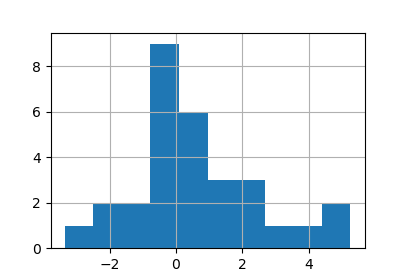

In [14]:
%matplotlib notebook
error.hist(bins = 10)

In [17]:
from scipy import stats

w, pvalue = stats.shapiro(error)
if pvalue > 0.005:
    print(f'Con un pvalue de: {pvalue} NO se encuentra evidencia para rechazar la hipótesis nula, por lo cual podemos decir que los datos distribuyen normal')
else:
    print(f'Con un pvalue de: {pvalue} se dice que se encontro evidencia para rechazarl hipótesis nula, que era que los datos provenian de una poblacion normalmente distribuida')

Con un pvalue de: 0.32524609565734863 NO se encuentra evidencia para rechazar la hipótesis nula, por lo cual podemos decir que los datos distribuyen normal
